In [1]:
import py_neuromodulation as pn
from py_neuromodulation import nm_BidsStream, nm_analysis
from sklearn import linear_model, metrics, model_selection
import os

In [2]:
PATH_RUN = r"C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\Berlin\sub-002\ses-EphysMedOff01\ieeg\sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_ieeg.vhdr"
PATH_BIDS = r"C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\Berlin"
PATH_OUT = r"C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\write_out\test_fooof"

In [21]:
pn_stream = nm_BidsStream.BidsStream(
    PATH_RUN=PATH_RUN,
    PATH_BIDS=PATH_BIDS,
    PATH_OUT=PATH_OUT,
    LIMIT_LOW=0,
    LIMIT_HIGH=100000,
    LIMIT_DATA=True
)

Extracting parameters from C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\Berlin\sub-002\ses-EphysMedOff01\ieeg\sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_ieeg.vhdr...
Setting channel info structure...
Reading events from C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\Berlin\sub-002\ses-EphysMedOff01\ieeg\sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_events.tsv.
Reading channel info from C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\Berlin\sub-002\ses-EphysMedOff01\ieeg\sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_channels.tsv.
Reading in coordinate system frame Other: None.
Reading electrode coords from C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\Berlin\sub-002\ses-EphysMedOff01\ieeg\sub-002_ses-EphysMedOff01_space-MNI152NLin2009bAsym_electrodes.tsv.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\ICN_admin\Anaconda3\envs\pn_env\lib\logging\__init__.py", line 1079, in emit
    msg = self.format(record)
  File "C:\Users\ICN_admin\Anaconda3\envs\pn_env\lib\logging\__init__.py", line 923, in format
    return fmt.format(record)
  File "C:\Users\ICN_admin\Anaconda3\envs\pn_env\lib\logging\__init__.py", line 659, in format
    record.message = record.getMessage()
  File "C:\Users\ICN_admin\Anaconda3\envs\pn_env\lib\logging\__init__.py", line 363, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\ICN_admin\Anaconda3\envs\pn_env\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ICN_admin\Anaconda3\envs\pn_env\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\ICN_admin\Anaconda3\envs\pn_env\lib\site-packages\ipykernel_launcher.py", line 16,

In [22]:
pn_stream.nm_channels

,name,rereference,used,target,type,status,new_name
0,ANALOG_R_ROTA_CH,None,0,0,misc,good,ANALOG_R_ROTA_CH
1,ECOG_L_1_SMC_AT,average,1,0,ecog,good,ECOG_L_1_SMC_AT-avgref
2,ECOG_L_2_SMC_AT,average,1,0,ecog,good,ECOG_L_2_SMC_AT-avgref
3,ECOG_L_3_SMC_AT,average,1,0,ecog,good,ECOG_L_3_SMC_AT-avgref
4,ECOG_L_4_SMC_AT,average,1,0,ecog,good,ECOG_L_4_SMC_AT-avgref
5,ECOG_L_5_SMC_AT,average,1,0,ecog,good,ECOG_L_5_SMC_AT-avgref
6,ECOG_L_6_SMC_AT,average,1,0,ecog,good,ECOG_L_6_SMC_AT-avgref
7,EEG_Cz_AO,None,0,0,misc,good,EEG_Cz_AO
8,EEG_Fz_AO,None,0,0,misc,good,EEG_Fz_AO
9,LFP_L_1_STN_BS,LFP_L_8_STN_BS,0,0,dbs,good,LFP_L_1_STN_BS-LFP_L_8_STN_BS


In [23]:
pn_stream.settings

{'out_path': 'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\rt_example',
 'sampling_rate_features': 10,
 'methods': {'raw_resampling': True,
  'raw_normalization': False,
  'feature_normalization': False,
  'kalman_filter': False,
  're_referencing': False,
  'notch_filter': True,
  'bandpass_filter': False,
  'stft': False,
  'fft': True,
  'raw_hjorth': False,
  'sharpwave_analysis': False,
  'return_raw': False,
  'project_cortex': False,
  'project_subcortex': False,
  'coherence': False,
  'fooof': True},
 'raw_resampling_settings': {'resample_freq': 1000},
 'raw_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'kalman_filter_settings': {'Tp': 0.1,
  'sigma_w': 0.7,
  'sigma_v': 1,
  'frequency_bands': ['theta',
   'alpha',
   'low beta',
   'high beta',
   'low gamma',
   'high gamma',
   'HFA']},
 '

In [24]:
pn_stream.settings["methods"]["sharpwave_analysis"] = False
pn_stream.settings["methods"]["fft"] = True
pn_stream.settings["methods"]["raw_hjorth"] = False
pn_stream.settings["methods"]["project_cortex"] = False
pn_stream.settings["methods"]["project_subcortex"] = False

In [25]:
pn_stream.run_bids()   

No Error occurred when testing the settings.
No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 7.50 Hz
- Upper transition bandwidth: 7.50 Hz
- Filter length: 999 samples (0.999 sec)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds belo

In [26]:
pn_stream.feature_arr.keys()[-29:]

Index(['ECOG_L_5_SMC_AT-avgref_fooof_p_0_bw',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_0_cf',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_0_pw',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_1_bw',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_1_cf',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_1_pw',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_2_bw',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_2_cf',
       'ECOG_L_5_SMC_AT-avgref_fooof_p_2_pw',
       'ECOG_L_6_SMC_AT-avgref_fft_theta', 'ECOG_L_6_SMC_AT-avgref_fft_alpha',
       'ECOG_L_6_SMC_AT-avgref_fft_low beta',
       'ECOG_L_6_SMC_AT-avgref_fft_high beta',
       'ECOG_L_6_SMC_AT-avgref_fft_low gamma',
       'ECOG_L_6_SMC_AT-avgref_fft_high gamma',
       'ECOG_L_6_SMC_AT-avgref_fft_HFA', 'ECOG_L_6_SMC_AT-avgref_fooof_a_exp',
       'ECOG_L_6_SMC_AT-avgref_fooof_a_offset',
       'ECOG_L_6_SMC_AT-avgref_fooof_p_0_bw',
       'ECOG_L_6_SMC_AT-avgref_fooof_p_0_cf',
       'ECOG_L_6_SMC_AT-avgref_fooof_p_0_pw',
       'ECOG_L_6_SMC_AT-avgref_fooof_p_1_bw',
       '

In [39]:
pn_stream.feature_arr['ECOG_L_6_SMC_AT-avgref_fooof_a_offset']

0     -0.660616
1      4.528878
2      9.313510
3      8.439382
4      5.473568
         ...   
710   -2.478732
711   -0.718326
712   -2.469713
713   -4.151222
714   -1.765222
Name: ECOG_L_6_SMC_AT-avgref_fooof_a_offset, Length: 715, dtype: float64

In [7]:
file_name = os.path.basename(PATH_RUN)
file_name

'sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_ieeg.vhdr'

In [8]:
feature_reader = nm_analysis.Feature_Reader(
        feature_dir=PATH_OUT,
        feature_file=file_name
)

Feature epoch average figure saved to: C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\write_out\test_fooof\sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_ieeg\MOV_aligned_features_ch_a_offset.png


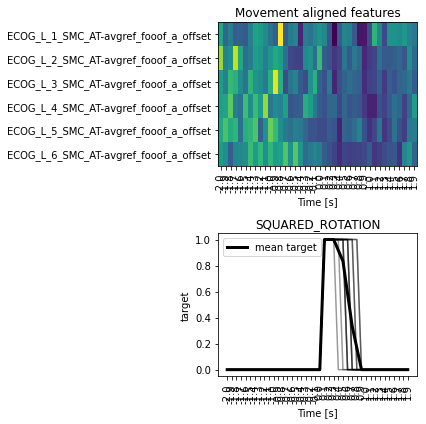

In [11]:
feature_reader.plot_target_averaged_channel(
        ch=None,
        list_feature_keywords=["a_offset"],
        epoch_len=4,
        threshold=0.5
    )

Feature epoch average figure saved to: C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\write_out\test_fooof\sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_ieeg\MOV_aligned_features_ch_a_exp.png


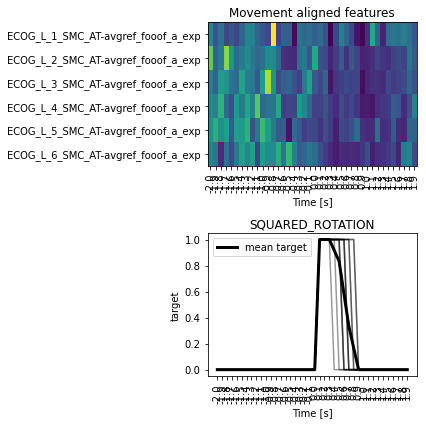

In [17]:
feature_reader.plot_target_averaged_channel(
        ch=None,
        list_feature_keywords=["a_exp"],
        epoch_len=4,
        threshold=0.5
    )

Feature epoch average figure saved to: C:\Users\ICN_admin\Documents\Decoding_Toolbox\Data\write_out\test_fooof\sub-002_ses-EphysMedOff01_task-SelfpacedRotationR_acq-StimOff_run-01_ieeg\MOV_aligned_features_ch_p_0_cf.png


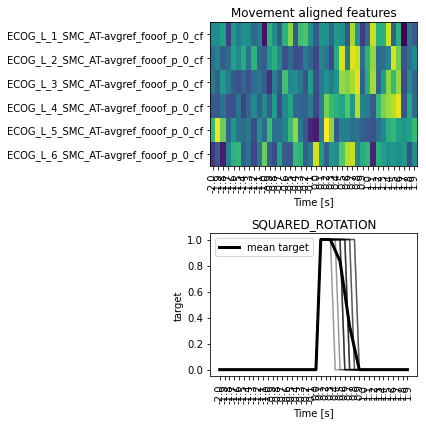

In [19]:
feature_reader.plot_target_averaged_channel(
        ch=None,
        list_feature_keywords=["p_0_cf"],
        epoch_len=4,
        threshold=0.5
    )